# Exploratory Data Analysis

After the Bioactivity data extraction from the chembl_websource_client exploratory data analysis will be performed.Bioactivity values will be converted to pIC50 values.




# Importing the required libraries

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np
import rdkit

# Importing the csv file using pandas 

In [ ]:
df = pd.read_csv('replicase1.csv')

To check the datatype of columns in the dataframe

In [ ]:
df.dtypes

canonical_smiles       object
molecule_chembl_id     object
molecule_pref_name     object
standard_type          object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
target_pref_name       object
type                   object
units                  object
value                 float64
dtype: object

## **Calculating Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 
# We will import the following descriptors from rdkit:
* Molecular Weight
* ALogP
* HBA
* HBD
* PSA

In [ ]:
    moldata= []
    for elem in df['canonical_smiles']:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
    baseData= np.arange(-1,1)
    i=0
   
    
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_HBA = rdkit.Chem.rdMolDescriptors.CalcNumHBA(mol) 
        desc_HBD=rdkit.Chem.rdMolDescriptors.CalcNumHBD((mol)) 
        desc_PSA=Descriptors.TPSA(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_HBA,
                        desc_HBD,desc_PSA])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","HBA","HBD","PSA"]   
    
    
  

# The descriptors imported from rdkit will now be combined into a dataframe


In [ ]:
descriptors = pd.DataFrame(data=baseData,columns=columnNames)
print(descriptors.head())


        MW     LogP  HBA  HBD     PSA
0  580.682  2.68582  8.0  3.0  156.70
1  547.653  1.39862  8.0  4.0  168.73
2  581.670  1.59522  8.0  4.0  168.73
3  659.781  0.87060  9.0  6.0  201.26
4  625.764  0.67400  9.0  6.0  201.26


 # Combining descriptors and bioactivties into a dataframe

In [ ]:
df_combined = pd.concat([df,descriptors], axis=1)

In [ ]:
df_combined

,canonical_smiles,molecule_chembl_id,molecule_pref_name,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,type,units,value,MW,LogP,HBA,HBD,PSA
0,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,CHEMBL194398,NaN,IC50,nM,870000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,870.0,580.682,2.68582,8.0,3.0,156.70
1,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL393608,NaN,IC50,nM,200000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,200.0,547.653,1.39862,8.0,4.0,168.73
2,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL238216,NaN,IC50,nM,300000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,300.0,581.670,1.59522,8.0,4.0,168.73
3,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL235873,NaN,IC50,nM,15000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,15.0,659.781,0.87060,9.0,6.0,201.26
4,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL397154,NaN,IC50,nM,10000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,10.0,625.764,0.67400,9.0,6.0,201.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,CHEMBL4208764,NaN,IC50,nM,4300.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,4.3,668.767,-2.95720,10.0,4.0,211.34
211,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,CHEMBL4212620,NaN,IC50,nM,5500.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,5.5,524.659,2.51690,7.0,3.0,143.14
212,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,CHEMBL4216101,NaN,IC50,nM,4100.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,4.1,628.721,-1.81440,10.0,4.0,203.50
213,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,CHEMBL4217568,NaN,IC50,nM,3200.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,3.2,468.551,0.95810,7.0,3.0,143.14


### **Conversion of  IC50 to pIC50 values**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       214.000000
mean      55138.037383
std       96554.024824
min         160.000000
25%        8900.000000
50%       28500.000000
75%       50000.000000
max      870000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

# Defining the custom function norm_value which will normalize the standard_value column

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,canonical_smiles,molecule_chembl_id,molecule_pref_name,standard_type,standard_units,target_chembl_id,target_organism,target_pref_name,type,units,value,MW,LogP,HBA,HBD,PSA,standard_value_norm
0,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,CHEMBL194398,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,870.0,580.682,2.68582,8.0,3.0,156.70,870000.0
1,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL393608,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,200.0,547.653,1.39862,8.0,4.0,168.73,200000.0
2,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL238216,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,300.0,581.670,1.59522,8.0,4.0,168.73,300000.0
3,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL235873,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,15.0,659.781,0.87060,9.0,6.0,201.26,15000.0
4,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,CHEMBL397154,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,10.0,625.764,0.67400,9.0,6.0,201.26,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,CHEMBL4208764,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,4.3,668.767,-2.95720,10.0,4.0,211.34,4300.0
211,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,CHEMBL4212620,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,5.5,524.659,2.51690,7.0,3.0,143.14,5500.0
212,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,CHEMBL4216101,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,4.1,628.721,-1.81440,10.0,4.0,203.50,4100.0
213,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,CHEMBL4217568,NaN,IC50,nM,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,IC50,uM,3.2,468.551,0.95810,7.0,3.0,143.14,3200.0


In [ ]:
df_norm.standard_value_norm.describe()

count       214.000000
mean      55138.037383
std       96554.024824
min         160.000000
25%        8900.000000
50%       28500.000000
75%       50000.000000
max      870000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final.head()
df_new=df_final.loc[:,['canonical_smiles','molecule_chembl_id','MW','LogP','HBA','HBD','PSA','pIC50']]
df_new.columns=['smiles','id','MW','LogP','HBD','HBA','PSA','pIC50']

In [ ]:
df_final.pIC50.describe()

count    214.000000
mean       4.635885
std        0.619425
min        3.060481
25%        4.301030
50%        4.545166
75%        5.050691
max        6.795880
Name: pIC50, dtype: float64

In [ ]:
# Conversion into csv file 

In [ ]:
df_new.to_csv('replicase_final.csv',index=False)

---

## **Exploratory Data Analysis (Chemical Space Analysis) via rdkit descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### *Scatter plot of MW versus LogP*


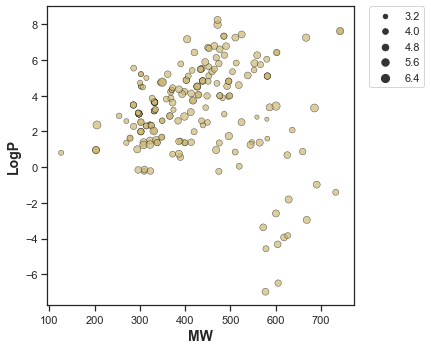

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_new, size='pIC50', edgecolor='black', alpha=0.7,color='y')

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')

### *Scatter plot of MW versus HBA*

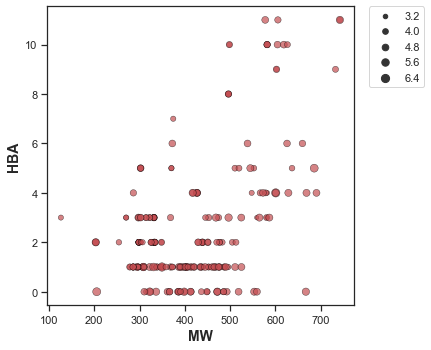

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='HBA', data=df_new, size='pIC50', edgecolor='black', alpha=0.7,color='r')

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('HBA', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_HBA.png')

### *Scatter plot of MW versus HBD*

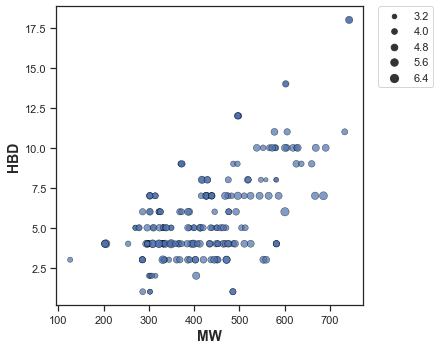

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='HBD', data=df_new, size='pIC50', edgecolor='black', alpha=0.7,color='b')

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('HBD', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_HBD.png')

### *Scatter plot of MW versus PSA*

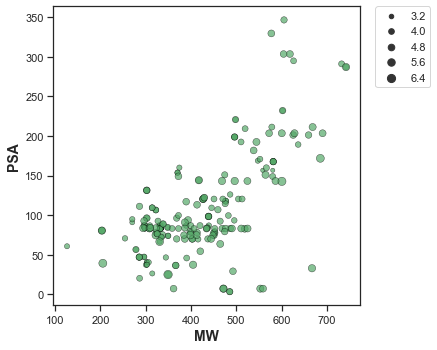

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='PSA', data=df_new, size='pIC50', edgecolor='black', alpha=0.7,color='g')

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('PSA', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_PSA.png')

## Visualising Bioactivity Distribution

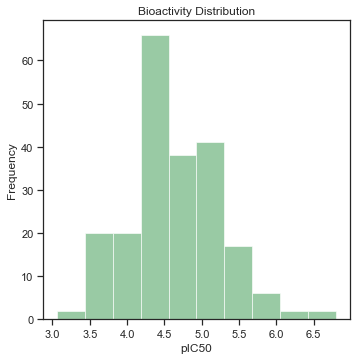

In [ ]:
plt.figure(figsize=(5.5, 5.5))
plt.hist(x='pIC50',data=df_new,color='g',alpha=0.6)
plt.xlabel("pIC50")
plt.ylabel("Frequency")
plt.title("Bioactivity Distribution")
plt.savefig('Bioactivity_Distribution.png')
plt.show()